In [78]:
# Use Erdos_Spring_2025 conda env as created
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

#Import some packages for visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



import shap

In [81]:
fname = 'data/dry_eye_disease_parsed.csv'
df0 = pd.read_csv(fname)

%run 'data/utils.py'
%run 'data/features_list.py'
%run 'data/model_params.py'

In [82]:
df = df0.copy()
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    #print(f'Classes for column {col}:',label_encoders[col].classes_)
    
print(df.columns.tolist())

#Remove columns which have been used to created features
omit_cols = ['systolic', 'diastolic',\
             'sleep_disorder', 'sleep_duration', 'sleep_quality', 'feel_sleepy_during_day', 'wake_up_during_night',\
                 'combined_condition']
df = df.drop(columns=omit_cols)

['gender', 'age', 'sleep_duration', 'sleep_quality', 'stress_level', 'heart_rate', 'daily_steps', 'physical_activity', 'height', 'weight', 'sleep_disorder', 'wake_up_during_night', 'feel_sleepy_during_day', 'caffeine_consumption', 'alcohol_consumption', 'smoking', 'medical_issue', 'ongoing_medication', 'smart_device_before_bed', 'average_screen_time', 'blue-light_filter', 'discomfort_eye-strain', 'redness_in_eye', 'itchiness/irritation_in_eye', 'dry_eye_disease', 'systolic', 'diastolic', 'bp_category', 'insomnia', 'combined_condition']


In [84]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "SGD Classifier": SGDClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Support Vector Classifier (SVC)": SVC(),
    "Nu-Support Vector Classifier": NuSVC(),
    "Linear SVC": LinearSVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

Model: Random Forest Classifier
Accuracy: 69.72%
Precision: 67.64%
Recall: 69.72%
F1 Score: 64.74%
------------------------------
Model: Decision Tree Classifier
Accuracy: 58.44%
Precision: 59.18%
Recall: 58.44%
F1 Score: 58.78%
------------------------------
Model: AdaBoost Classifier
Accuracy: 69.30%
Precision: 67.68%
Recall: 69.30%
F1 Score: 62.55%
------------------------------
Model: Gradient Boosting Classifier
Accuracy: 70.24%
Precision: 68.56%
Recall: 70.24%
F1 Score: 65.32%
------------------------------
Model: Bagging Classifier
Accuracy: 61.62%
Precision: 60.42%
Recall: 61.62%
F1 Score: 60.92%
------------------------------
Model: Extra Trees Classifier
Accuracy: 69.28%
Precision: 66.79%
Recall: 69.28%
F1 Score: 64.73%
------------------------------
Model: Logistic Regression
Accuracy: 69.24%
Precision: 67.40%
Recall: 69.24%
F1 Score: 62.69%
------------------------------
Model: Ridge Classifier
Accuracy: 68.72%
Precision: 66.59%
Recall: 68.72%
F1 Score: 61.36%
-------------

/Users/debanjansarkar/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Support Vector Classifier (SVC)
Accuracy: 70.22%
Precision: 68.52%
Recall: 70.22%
F1 Score: 65.30%
------------------------------
Model: Nu-Support Vector Classifier
Accuracy: 59.90%
Precision: 58.74%
Recall: 59.90%
F1 Score: 59.24%
------------------------------
Model: Linear SVC
Accuracy: 68.72%
Precision: 66.59%
Recall: 68.72%
F1 Score: 61.36%
------------------------------
Model: K-Nearest Neighbors
Accuracy: 62.12%
Precision: 59.96%
Recall: 62.12%
F1 Score: 60.72%
------------------------------
Model: Linear Discriminant Analysis
Accuracy: 69.26%
Precision: 67.39%
Recall: 69.26%
F1 Score: 62.81%
------------------------------
Model: Quadratic Discriminant Analysis
Accuracy: 70.16%
Precision: 68.35%
Recall: 70.16%
F1 Score: 65.37%
------------------------------


/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_95080/2356973825.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Accuracy", y="Model", data=df_metrics, palette="rocket")


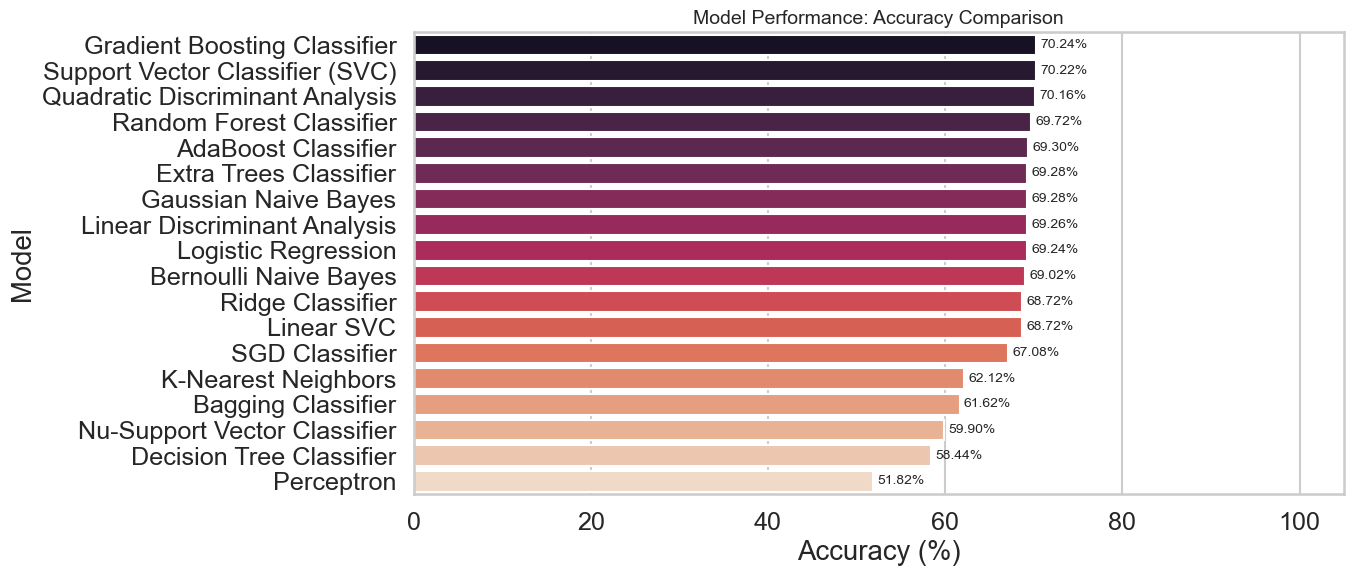

In [91]:
x=df.drop(['dry_eye_disease'],axis=1)
y=df['dry_eye_disease']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    metrics['F1 Score'].append(f1 * 100)

    print(f"Model: {name}")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("-" * 30)
    

# Convert metrics dictionary to DataFrame
df_metrics = pd.DataFrame(metrics)

# Sort by accuracy in descending order
df_metrics = df_metrics.sort_values(by="Accuracy", ascending=False)

# Set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Accuracy", y="Model", data=df_metrics, palette="rocket")

# Add accuracy values on bars
for index, value in enumerate(df_metrics["Accuracy"]):
    ax.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=10)

# Labels and title
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Performance: Accuracy Comparison", fontsize=14)
plt.xlim(0, 105)  # Extend limit slightly for better text visibility

plt.show()

Model: Random Forest Classifier
Accuracy: 51.68%
Precision: 50.75%
Recall: 51.68%
F1 Score: 50.02%
------------------------------
Model: Decision Tree Classifier
Accuracy: 49.60%
Precision: 49.62%
Recall: 49.60%
F1 Score: 49.61%
------------------------------
Model: AdaBoost Classifier
Accuracy: 52.38%
Precision: 50.04%
Recall: 52.38%
F1 Score: 44.41%
------------------------------
Model: Gradient Boosting Classifier
Accuracy: 51.92%
Precision: 50.33%
Recall: 51.92%
F1 Score: 47.79%
------------------------------
Model: Bagging Classifier
Accuracy: 50.60%
Precision: 49.50%
Recall: 50.60%
F1 Score: 48.82%
------------------------------
Model: Extra Trees Classifier
Accuracy: 51.46%
Precision: 50.70%
Recall: 51.46%
F1 Score: 50.31%
------------------------------
Model: Logistic Regression
Accuracy: 52.60%
Precision: 49.21%
Recall: 52.60%
F1 Score: 41.14%
------------------------------
Model: Ridge Classifier
Accuracy: 52.60%
Precision: 49.19%
Recall: 52.60%
F1 Score: 41.12%
-------------

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_95080/1821766451.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Accuracy", y="Model", data=df_metrics, palette="rocket")


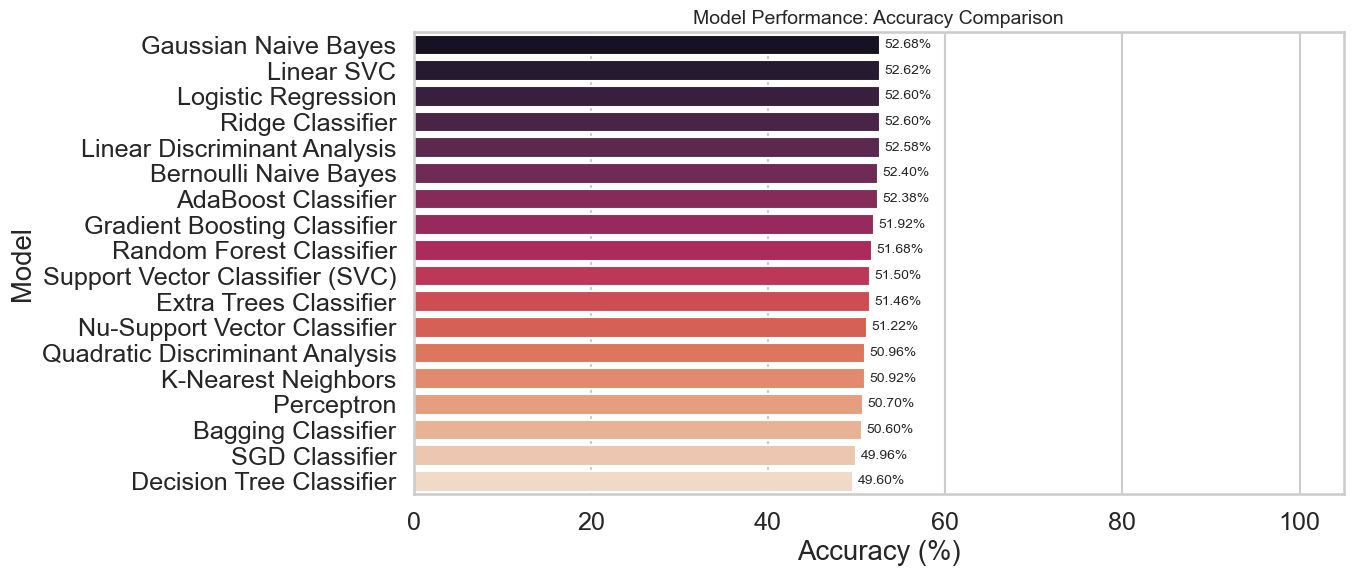

In [93]:
x=df.drop(['insomnia'],axis=1)
y=df['insomnia']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    metrics['F1 Score'].append(f1 * 100)

    print(f"Model: {name}")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("-" * 30)
    

# Convert metrics dictionary to DataFrame
df_metrics = pd.DataFrame(metrics)

# Sort by accuracy in descending order
df_metrics = df_metrics.sort_values(by="Accuracy", ascending=False)

# Set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Accuracy", y="Model", data=df_metrics, palette="rocket")

# Add accuracy values on bars
for index, value in enumerate(df_metrics["Accuracy"]):
    ax.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=10)

# Labels and title
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Performance: Accuracy Comparison", fontsize=14)
plt.xlim(0, 105)  # Extend limit slightly for better text visibility

plt.show()

In [109]:
df = df0.copy()
df = df[(df['combined_condition']=='both') | (df['combined_condition']=='none')]
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    #print(f'Classes for column {col}:',label_encoders[col].classes_)
    
print(df.columns.tolist())

#Remove columns which have been used to created features
omit_cols = ['systolic', 'diastolic',\
             'sleep_disorder', 'sleep_duration', 'sleep_quality', 'feel_sleepy_during_day', 'wake_up_during_night',\
                 'dry_eye_disease', 'insomnia']
df = df.drop(columns=omit_cols)


['gender', 'age', 'sleep_duration', 'sleep_quality', 'stress_level', 'heart_rate', 'daily_steps', 'physical_activity', 'height', 'weight', 'sleep_disorder', 'wake_up_during_night', 'feel_sleepy_during_day', 'caffeine_consumption', 'alcohol_consumption', 'smoking', 'medical_issue', 'ongoing_medication', 'smart_device_before_bed', 'average_screen_time', 'blue-light_filter', 'discomfort_eye-strain', 'redness_in_eye', 'itchiness/irritation_in_eye', 'dry_eye_disease', 'systolic', 'diastolic', 'bp_category', 'insomnia', 'combined_condition']


Model: Random Forest Classifier
Accuracy: 67.10%
Precision: 68.22%
Recall: 67.10%
F1 Score: 62.40%
------------------------------
Model: Decision Tree Classifier
Accuracy: 56.81%
Precision: 56.49%
Recall: 56.81%
F1 Score: 56.64%
------------------------------
Model: AdaBoost Classifier
Accuracy: 66.57%
Precision: 69.18%
Recall: 66.57%
F1 Score: 60.51%
------------------------------
Model: Gradient Boosting Classifier
Accuracy: 68.27%
Precision: 70.26%
Recall: 68.27%
F1 Score: 63.70%
------------------------------
Model: Bagging Classifier
Accuracy: 62.90%
Precision: 61.04%
Recall: 62.90%
F1 Score: 59.64%
------------------------------
Model: Extra Trees Classifier
Accuracy: 67.30%
Precision: 68.08%
Recall: 67.30%
F1 Score: 63.03%
------------------------------
Model: Logistic Regression
Accuracy: 67.46%
Precision: 69.95%
Recall: 67.46%
F1 Score: 62.10%
------------------------------
Model: Ridge Classifier
Accuracy: 67.14%
Precision: 69.67%
Recall: 67.14%
F1 Score: 61.53%
-------------

/var/folders/8y/55dw_cwj3hv6wylylp7fwhb80000gn/T/ipykernel_95080/3425125616.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Accuracy", y="Model", data=df_metrics, palette="rocket")


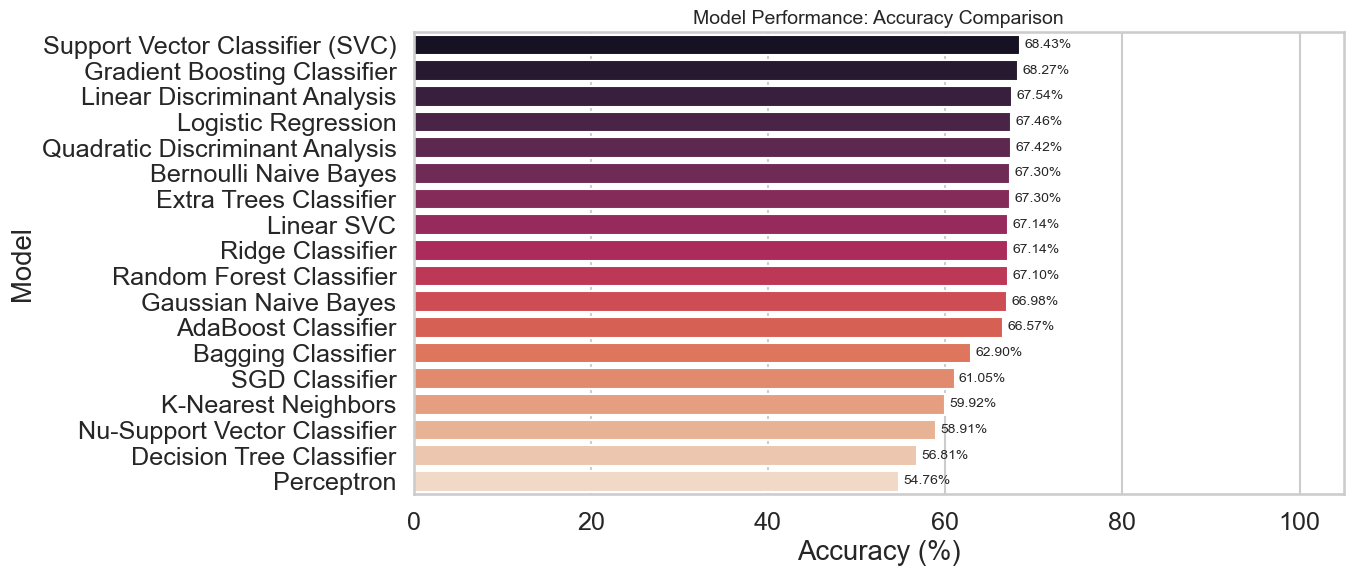

In [110]:
x=df.drop(['combined_condition'],axis=1)
y=df['combined_condition']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    metrics['F1 Score'].append(f1 * 100)

    print(f"Model: {name}")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print("-" * 30)
    

# Convert metrics dictionary to DataFrame
df_metrics = pd.DataFrame(metrics)

# Sort by accuracy in descending order
df_metrics = df_metrics.sort_values(by="Accuracy", ascending=False)

# Set style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Accuracy", y="Model", data=df_metrics, palette="rocket")

# Add accuracy values on bars
for index, value in enumerate(df_metrics["Accuracy"]):
    ax.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=10)

# Labels and title
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Performance: Accuracy Comparison", fontsize=14)
plt.xlim(0, 105)  # Extend limit slightly for better text visibility

plt.show()